In [74]:
from aes_stream import AES_ECB, AES_CBC, AES_CFB, AES_OFB, AES_CTR
from rc4 import RC4
from salsa20 import Salsa20
import numpy as np
import time
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tabulate import tabulate

sns.set(style="whitegrid")

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def test_time(Algo, n_bytes_key, n_bytes_stream):
    key = np.random.randint(0, 256, n_bytes_key, dtype=np.uint8)
    stream = np.random.randint(0, 256, n_bytes_stream, dtype=np.uint8)
    
    start = time.time()
    cipher = Algo(key)
    assert np.array_equal(stream, cipher.decode(cipher.encode(stream))), str(Algo) + " works bad!"
    
    return time.time() - start

In [12]:
test_time(RC4, 256, 512)

0.014789342880249023

In [13]:
test_time(Salsa20, 32, 512)

0.037580251693725586

In [28]:
test_time(AES_ECB, 16, 512)

0.39632344245910645

In [15]:
test_time(AES_CBC, 16, 512)

0.388901948928833

In [32]:
test_time(AES_CFB, 16, 512)

1.4803411960601807

In [66]:
test_time(AES_OFB, 16, 512)

0.39235353469848633

In [23]:
test_time(AES_CTR, 16, 512)

0.37130260467529297

In [75]:
data = {"RC4": [], "Salsa20": [], "AES_ECB": [], "AES_CBC": [], "AES_CFB": [], "AES_OFB": [], "AES_CTR": []}
points = 10
init_power = 9
power_bytes = init_power
upper_bound = 30
rc4_s = salsa20_s = ecb_s = cbc_s = cfb_s = ofb_s = ctr_s = 0
for i in range(points):
    print(i)
    n_bytes = 2**power_bytes
    
    if rc4_s < upper_bound:
        rc4_s = test_time(RC4, 256, n_bytes)

    if salsa20_s < upper_bound:
        salsa20_s = test_time(Salsa20, 32, n_bytes)
    
    if ecb_s < upper_bound:
        ecb_s = test_time(AES_ECB, 16, n_bytes)
        
    if cbc_s < upper_bound:
        cbc_s = test_time(AES_CBC, 16, n_bytes)
        
    if cfb_s < upper_bound:
        cfb_s = test_time(AES_CFB, 16, n_bytes)
        
    if ofb_s < upper_bound:
        ofb_s = test_time(AES_OFB, 16, n_bytes)
    
    if ctr_s < upper_bound:
        ctr_s = test_time(AES_CTR, 16, n_bytes)
    
    data["RC4"].append(rc4_s)
    data["Salsa20"].append(salsa20_s)
    data["AES_ECB"].append(ecb_s)
    data["AES_CBC"].append(cbc_s)
    data["AES_CFB"].append(cfb_s)
    data["AES_OFB"].append(ofb_s)
    data["AES_CTR"].append(ctr_s)
    
    power_bytes += 1

0
1
2
3
4
5
6
7
8
9


In [76]:
plt.tight_layout()
plt.rcParams["figure.figsize"] = (13,10)

<Figure size 936x720 with 0 Axes>

[Text(0, 0.5, 'Seconds'), Text(0.5, 0, 'Bytes in stream')]

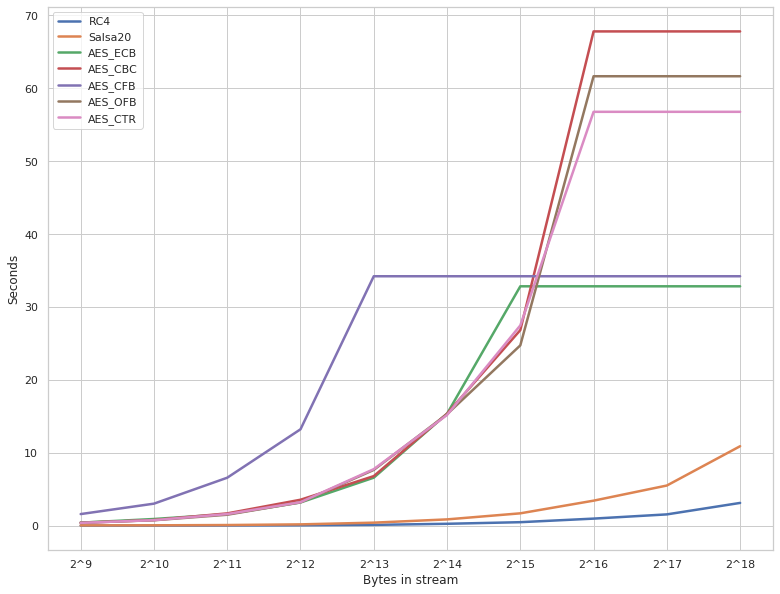

In [77]:
for k in data:
    y = data[k]
    x = list(range(len(y)))
    
    ax = sns.lineplot(x=x, y=y, linewidth=2.5, label=k)

plt.xticks(range(points))
ax.set_xticklabels([f"2^{i}" for i in range(init_power, init_power + points)])
ax.set(ylabel="Seconds", xlabel="Bytes in stream")

In [65]:
data

{'RC4': [0.016351938247680664,
  0.013506174087524414,
  0.026995420455932617,
  0.04961991310119629,
  0.09851455688476562,
  0.19706487655639648,
  0.4495110511779785,
  0.8327219486236572,
  1.6121234893798828,
  3.165658473968506],
 'Salsa20': [0.027912139892578125,
  0.04619884490966797,
  0.09475183486938477,
  0.18508243560791016,
  0.3817882537841797,
  0.7989895343780518,
  1.4733831882476807,
  2.896946907043457,
  5.582991123199463,
  11.134410381317139],
 'AES_ECB': [0.40535473823547363,
  0.8475179672241211,
  1.733201265335083,
  3.1269989013671875,
  6.2191619873046875,
  12.718210220336914,
  26.333178758621216,
  51.61341714859009,
  103.6282434463501,
  103.6282434463501],
 'AES_CBC': [0.39551877975463867,
  0.9117014408111572,
  1.7475640773773193,
  3.537883996963501,
  6.27518367767334,
  13.362740993499756,
  25.533928155899048,
  54.979976177215576,
  103.74931621551514,
  103.74931621551514],
 'AES_CFB': [1.6887288093566895,
  3.4896903038024902,
  6.86085891723